In [1]:
import pandas as pd
data= pd.read_csv('Breast_cancer.csv')
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [3]:
data['outcome'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,outcome
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [4]:
x=data.iloc[:,[2]]
y=data.outcome

In [5]:
x.head()

,radius_mean
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8947368421052632


col_0,0,1
outcome,,
0,105,7
1,11,48


In [15]:
model.predict_proba(X_test)#right possitive probability left negative probability

array([[3.20743497e-01, 6.79256503e-01],
       [9.96331697e-01, 3.66830317e-03],
       [7.47519132e-01, 2.52480868e-01],
       [1.57966917e-01, 8.42033083e-01],
       [9.76094506e-01, 2.39054937e-02],
       [9.94467455e-01, 5.53254484e-03],
       [9.82374061e-01, 1.76259390e-02],
       [8.20690633e-01, 1.79309367e-01],
       [7.27865895e-02, 9.27213410e-01],
       [6.38034182e-01, 3.61965818e-01],
       [8.83833512e-01, 1.16166488e-01],
       [8.92084994e-01, 1.07915006e-01],
       [8.35449181e-01, 1.64550819e-01],
       [6.77686491e-01, 3.22313509e-01],
       [1.26449287e-01, 8.73550713e-01],
       [6.54523546e-02, 9.34547645e-01],
       [9.62784299e-01, 3.72157012e-02],
       [7.89841836e-01, 2.10158164e-01],
       [9.34106036e-01, 6.58939636e-02],
       [3.80822472e-02, 9.61917753e-01],
       [1.70782898e-01, 8.29217102e-01],
       [4.68029110e-01, 5.31970890e-01],
       [9.94328802e-01, 5.67119819e-03],
       [4.32106619e-01, 5.67893381e-01],
       [1.426989

In [22]:
model.predict_proba(X_test)[4,1]

0.023905493687368284

In [23]:
model.predict_proba(X_test)[:,1]#taking all probability of negative

array([0.6792565 , 0.0036683 , 0.25248087, 0.84203308, 0.02390549,
       0.00553254, 0.01762594, 0.17930937, 0.92721341, 0.36196582,
       0.11616649, 0.10791501, 0.16455082, 0.32231351, 0.87355071,
       0.93454765, 0.0372157 , 0.21015816, 0.06589396, 0.96191775,
       0.8292171 , 0.53197089, 0.0056712 , 0.56789338, 0.9857301 ,
       0.99212992, 0.16031785, 0.99739198, 0.02955085, 0.1001832 ,
       0.11405363, 0.01195329, 0.98992794, 0.06783521, 0.41361585,
       0.2171274 , 0.29144773, 0.00184956, 0.24665376, 0.07687409,
       0.0254014 , 0.00229149, 0.00115817, 0.022044  , 0.068494  ,
       0.87916887, 0.18084071, 0.07687409, 0.2564159 , 0.00267895,
       0.21889557, 0.04070867, 0.6792565 , 0.04770642, 0.08063588,
       0.99984753, 0.89277589, 0.18084071, 0.17033379, 0.01310748,
       0.99927791, 0.10495593, 0.51126937, 0.04540497, 0.02342622,
       0.36918212, 0.05529278, 0.01658014, 0.23714475, 0.36918212,
       0.00953789, 0.01207641, 0.01351613, 0.00246872, 0.02809

In [31]:
import numpy as np
y_predict_th3=np.where(model.predict_proba(X_test)[:,1]>0.3,1,0)#theshold is 0.3

In [32]:
pd.crosstab(y_test,y_predict_th3)

col_0,0,1
outcome,,
0,102,10
1,8,51


In [43]:
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))


Threshold : 0.0
[[  0 112]
 [  0  59]]
Threshold : 0.1
[[67 45]
 [ 3 56]]
Threshold : 0.2
[[89 23]
 [ 5 54]]
Threshold : 0.30000000000000004
[[102  10]
 [  8  51]]
Threshold : 0.4
[[104   8]
 [ 10  49]]
Threshold : 0.5
[[105   7]
 [ 11  48]]
Threshold : 0.6000000000000001
[[108   4]
 [ 14  45]]
Threshold : 0.7000000000000001
[[108   4]
 [ 20  39]]
Threshold : 0.8
[[108   4]
 [ 22  37]]
Threshold : 0.9
[[111   1]
 [ 28  31]]


In [52]:
x=data.drop(["id","diagnosis","Unnamed: 32","outcome"],axis="columns")
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x.values,y,test_size=0.3,random_state=10)

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [83]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.05):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0 112]
 [  0  59]]
Threshold : 0.05
[[95 17]
 [ 0 59]]
Threshold : 0.1
[[100  12]
 [  1  58]]
Threshold : 0.15000000000000002
[[101  11]
 [  2  57]]
Threshold : 0.2
[[105   7]
 [  2  57]]
Threshold : 0.25
[[105   7]
 [  2  57]]
Threshold : 0.30000000000000004
[[106   6]
 [  2  57]]
Threshold : 0.35000000000000003
[[106   6]
 [  2  57]]
Threshold : 0.4
[[106   6]
 [  2  57]]
Threshold : 0.45
[[106   6]
 [  2  57]]
Threshold : 0.5
[[106   6]
 [  2  57]]
Threshold : 0.55
[[106   6]
 [  2  57]]
Threshold : 0.6000000000000001
[[107   5]
 [  3  56]]
Threshold : 0.65
[[107   5]
 [  3  56]]
Threshold : 0.7000000000000001
[[107   5]
 [  4  55]]
Threshold : 0.75
[[107   5]
 [  4  55]]
Threshold : 0.8
[[107   5]
 [  5  54]]
Threshold : 0.8500000000000001
[[108   4]
 [  5  54]]
Threshold : 0.9
[[108   4]
 [  7  52]]
Threshold : 0.9500000000000001
[[110   2]
 [  7  52]]


In [63]:
from sklearn.metrics import roc_curve,roc_auc_score

In [67]:
tpr,fpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [68]:
fpr

array([0.        , 0.08474576, 0.88135593, 0.88135593, 0.91525424,
       0.91525424, 0.96610169, 0.96610169, 0.98305085, 0.98305085,
       1.        , 1.        ])

In [69]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.91896777e-01, 9.00812717e-01,
       8.59849984e-01, 8.15217082e-01, 5.89287124e-01, 1.55324051e-01,
       1.38626087e-01, 1.10746615e-01, 7.10252772e-02, 6.40144196e-08])

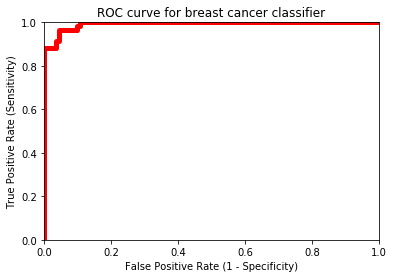

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [79]:
import numpy as np
y_predict_th3=np.where(model.predict_proba(X_test)[:,1]>0.10,1,0)

In [81]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9930387409200969

In [80]:
pd.crosstab(y_test,y_predict_th3)

col_0,0,1
outcome,,
0,100,12
1,1,58


In [82]:
#https://www.youtube.com/watch?v=2ru56OLpBOQ